<a href="https://colab.research.google.com/github/TashfikS/Soft-Computing/blob/main/170104121_exp_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locate Dataset Path & Add Library

In [1]:
from google.colab import drive
drive.mount('/Soft_Computing_Dataset')

Mounted at /Soft_Computing_Dataset


In [10]:
%cd /Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

In [20]:
import os
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

# Dataset  

In [12]:
df1 = pd.read_csv('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/training-c.csv',sep = ',')
df = df1

column_list = []
for i in df.columns:
  if (i == 'filename') or (i == 'digit'):
    pass
  else:
    column_list.append(i)
print(column_list)
df = df.drop(column_list, axis = 1)
df

['original filename', 'scanid', 'database name original', 'contributing team', 'database name']


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
...,...,...
24293,c24293.png,3
24294,c24294.png,2
24295,c24295.png,7
24296,c24296.png,2


In [46]:
class assignment_dataset_C(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        path = os.path.join(self.root, self.data.iloc[index, 0])
        image = Image.open(path)
        y_label = self.data.iloc[index, 1]

        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [48]:
dataset = assignment_dataset_C(
    df = df,
    root = "/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/training-c",
    transform = transforms.ToTensor(),
)

print(len(dataset))

24298


In [50]:
im = Image.open('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/training-c/c00000.png')
width, height = im.size
print(width, height)

180 180


# Experiment 01

## Hyperparameter & Dataset splitting

In [51]:
batch_size = 20
num_iters = 20000
input_dim = width * height 
num_hidden = 200
output_dim = 10
split_ratio = 0.20
learning_rate = 0.01

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [52]:
dataset_size = len(dataset)
test_size = round(dataset_size * split_ratio)
train_size = dataset_size - test_size

train_set, test_set = torch.utils.data.random_split(dataset, (train_size, test_size))

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True) 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print('Epoch Number: ',num_epochs)
print('Train set: ',len(train_set))
print('Train set: ',len(test_set))
print('Train dataloader: ',len(train_loader))
print('Train dataloader: ',len(test_loader))

Epoch Number:  20
Train set:  19438
Train set:  4860
Train dataloader:  972
Train dataloader:  243


In [36]:
itr_loss = []
acc = []
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 784 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 784 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 784 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 784 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)   
             
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
  try:
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            itr_loss.append(loss.item())
            acc.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
  except Exception as e:
    print(e)

Iteration: 500. Loss: 2.3014094829559326. Accuracy: 9.405227413047951
Iteration: 1000. Loss: 2.297990083694458. Accuracy: 9.549289977361598
Iteration: 1500. Loss: 2.299696445465088. Accuracy: 10.043218769294093
Iteration: 2000. Loss: 2.305424213409424. Accuracy: 9.755093640666804
Iteration: 2500. Loss: 2.298438549041748. Accuracy: 9.549289977361598
Iteration: 3000. Loss: 2.306748628616333. Accuracy: 10.722370858201275
Iteration: 3500. Loss: 2.2992091178894043. Accuracy: 10.187281333607737
Iteration: 4000. Loss: 2.2991409301757812. Accuracy: 9.425807779378474
Iteration: 4500. Loss: 2.2938990592956543. Accuracy: 9.405227413047951
Iteration: 5000. Loss: 2.303135633468628. Accuracy: 9.755093640666804
Iteration: 5500. Loss: 2.29744815826416. Accuracy: 9.755093640666804
Iteration: 6000. Loss: 2.3057940006256104. Accuracy: 9.899156204980448
Iteration: 6500. Loss: 2.302633285522461. Accuracy: 9.755093640666804
Iteration: 7000. Loss: 2.304318904876709. Accuracy: 9.405227413047951
Iteration: 750

## Save Model

In [37]:
torch.save(model.state_dict(), '/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/model_base_exp_1.pkl')

## Visualize Model Result

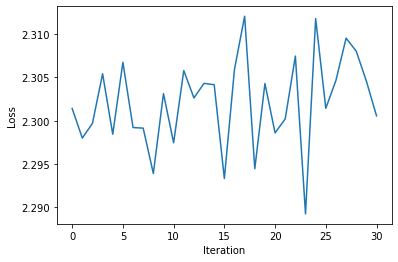

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(itr_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/loss_exp_01.png')

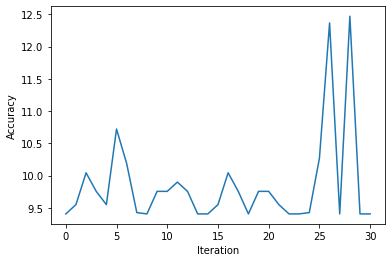

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/acc_exp_01.png')

# Experiment 02

## Applied Experiments

> Try 01

*   Hyperparameters
---
    batch_size = 20
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 200
    output_dim = 10
    learning_rate = 0.01

*   Hidden layers
---
    Layers Numbers - 3
    Activation Function - ReLu for all layer 
    Optimizer - SGD 
*   Result 
----
    Accuracy - 9.84


> Try 02

*   Hyperparameters
---
    batch_size = 200
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 200
    output_dim = 10
    learning_rate = 0.01

*   Hidden layers
---
    Layers Numbers - 3
    Activation Function - ReLu for all layer 
    Optimizer - SGD 
*   Result 
----
    Accuracy - 10.34


> Try 03

*   Hyperparameters
---
    batch_size = 20
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 200
    output_dim = 10
    learning_rate = 0.01

*   Hidden layers
---
    Layers Numbers - 2
    Activation Function - Tanh for all layer 
    Optimizer - SGD 
*   Result 
----
    Accuracy - 39.52


> Try 04

*   Hyperparameters
---
    batch_size = 200
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 200
    output_dim = 10
    learning_rate = 0.01

*   Hidden layers
---
    Layers Numbers - 3
    Activation Function - Tanh for all layer 
    Optimizer - SGD 
*   Result 
----
    Accuracy - 41.02

> Try 05

*   Hyperparameters
---
    batch_size = 200
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 200
    output_dim = 10
    learning_rate = 0.01

*   Hidden layers
---
    Layers Numbers - 3
    Activation Function - Tanh for all layer 
    Optimizer - Adam 
*   Result 
----
    Accuracy - 11.44

> Try 06

*   Hyperparameters
---
    batch_size = 500
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 500
    output_dim = 10
    learning_rate = 0.1

*   Hidden layers
---
    Layers Numbers - 2
    Activation Function - First is ReLu & last one is Tanh
    Optimizer - SGD 
*   Result 
----
    Accuracy - 69.56


> Try 07

*   Hyperparameters
---
    batch_size = 500
    num_iters = 20000
    input_dim = 28*28
    num_hidden = 500
    output_dim = 10
    learning_rate = 0.1

*   Hidden layers
---
    Layers Numbers - 3
    Activation Function - First two are ReLu & last one is Tanh
    Optimizer - SGD 
*   Result 
----
    Accuracy - 69.56

















## Hyperparameter & Dataset splitting

In [53]:
batch_size = 200
num_iters = 20000
input_dim = width * height 
num_hidden = 500
output_dim = 10
split_ratio = 0.20
learning_rate = 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [54]:
dataset_size = len(dataset)
test_size = round(dataset_size * split_ratio)
train_size = dataset_size - test_size

train_set, test_set = torch.utils.data.random_split(dataset, (train_size, test_size))

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True) 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print('Epoch Number: ',num_epochs)
print('Train set: ',len(train_set))
print('Train set: ',len(test_set))
print('Train dataloader: ',len(train_loader))
print('Train dataloader: ',len(test_loader))

Epoch Number:  205
Train set:  19438
Train set:  4860
Train dataloader:  98
Train dataloader:  25


In [42]:
itr_loss = []
acc = []
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.tanh_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.tanh_1(out)

        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
  try:
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            itr_loss.append(loss.item())
            acc.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
  except Exception as e:
    print(e)

Iteration: 500. Loss: 2.231189012527466. Accuracy: 10.002058036633052
Iteration: 1000. Loss: 2.1633474826812744. Accuracy: 23.81148384441243
Iteration: 1500. Loss: 2.1735305786132812. Accuracy: 25.210948754887838
Iteration: 2000. Loss: 2.2163197994232178. Accuracy: 29.20353982300885
Iteration: 2500. Loss: 2.0771377086639404. Accuracy: 27.824655278863965
Iteration: 3000. Loss: 2.143998622894287. Accuracy: 24.264251903683885
Iteration: 3500. Loss: 2.0801339149475098. Accuracy: 31.508540852027167
Iteration: 4000. Loss: 2.1541528701782227. Accuracy: 32.908005762502576
Iteration: 4500. Loss: 2.059934377670288. Accuracy: 26.178225972422307
Iteration: 5000. Loss: 2.3012442588806152. Accuracy: 24.181930438361803
Iteration: 5500. Loss: 2.046219825744629. Accuracy: 22.453179666598064
Iteration: 6000. Loss: 1.7995233535766602. Accuracy: 35.19242642519037
Iteration: 6500. Loss: 1.9518561363220215. Accuracy: 32.16711257460383
Iteration: 7000. Loss: 1.7533903121948242. Accuracy: 34.24572957398642
It

## Save Model

In [43]:
torch.save(model.state_dict(), '/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/model_base_exp_02.pkl')

## Visualize Model Result

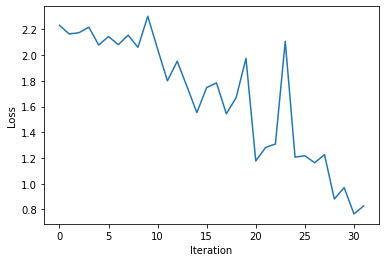

<Figure size 432x288 with 0 Axes>

In [44]:
plt.plot(itr_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/loss_exp_02.png')

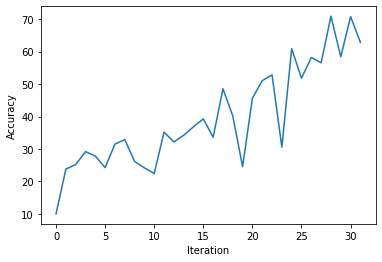

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_C/acc_exp_02.png')